Точка минимума: ( 4.249999999999902  ,  -2.2000000000000135 )
Значение функции в этой точке:  1.2974999999999994
Количество итераций:  7


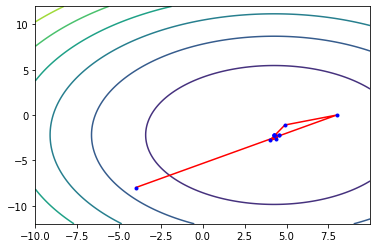

In [2]:
import numpy as np
import math as m
import pylab
import matplotlib.pyplot as plt

fout  = list()
h=1
eps=0.000001

def Func(x,y):
    return (x*x - 8.5*x + y*y + 4.4*y + 24.2)

def makeData():
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-12, 12, 0.01)
    xgrid, ygrid = np.meshgrid(x, y)
 
    zgrid = xgrid**2 - 8.5*xgrid +ygrid**2 + 4.4*ygrid + 24.2
    
    return xgrid, ygrid, zgrid

def Issled (n):
    global x1,x2,x11,x21,x12,r
    if (n==1): x11=x1+h
    if (n==2): x12=x2+h
    r1=Func(x11,x12)
    if (r1<r):
        x1=x11
        x2=x12
        r=r1
    else:
        if (n==1): x11=x1-h
        if (n==2): x12=x2-h
        r1=Func(x11,x12)
        if (r1<r): 
            x1=x11
            x2=x12
            r=r1
        
def main():
    global h,x1,x2,x11,x21,x12,r
    
    it=0
    x1=-5.
    x2=-9.
    xb1=x1
    xb2=x2
    rb=Func(xb1,xb2)
    
    
    while (h>eps):
        it+=1
        x1=xb1
        x2=xb2
        r=rb
        x11=x1
        x12=x2
        
        Issled(1)
        Issled(2)
        fout.append([x11,x12,Func(x11,x12)])
        if (r < rb):
            while (1):
                xpb1=xb1
                xpb2=xb2
                rpb=rb
                xb1=float(x1)
                xb2=float(x2)
                rb=r
                
                xp1=xpb1+2*(xb1-xpb1)
                xp2=xpb2+2*(xb2-xpb2)
                
                x1=xp1
                x2=xp2
                x11=x1
                x12=x2
                
                Issled(1)
                Issled(2)
                if (r>=rb):
                    break
                    
            fout.append([x11,x12,Func(x11,x12)])            
        h=h/10
    print("Точка минимума: (",xb1," , ",xb2,")")
    print("Значение функции в этой точке: ", Func(xb1,xb2))
    print("Количество итераций: ", it)
main()  

x, y, z = makeData()
pylab.contour(x, y, z)
data = np.array(fout)
plt.plot(data[:,0], data[:,1], 'r')
plt.plot(data[:,0], data[:,1], 'b.')
pylab.show()